<a href="https://colab.research.google.com/github/pallabm22/Titanic_survival/blob/main/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [156]:
dataset=pd.read_csv('train.csv')

In [157]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
dataset.shape

(891, 12)

In [159]:
dataset.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [160]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
dataset=dataset.drop(dataset.columns[-2],axis=1)

In [163]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [164]:
mean_values=dataset['Age'].mean()

In [165]:
dataset['Age'].fillna(mean_values,inplace=True)

In [166]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [167]:
print(dataset['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [168]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)

In [169]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [170]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
survived = dataset[dataset['Survived'] == 1]
not_survived=dataset[dataset['Survived'] == 0]

In [172]:
survived.shape, not_survived.shape

((342, 11), (549, 11))

In [173]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

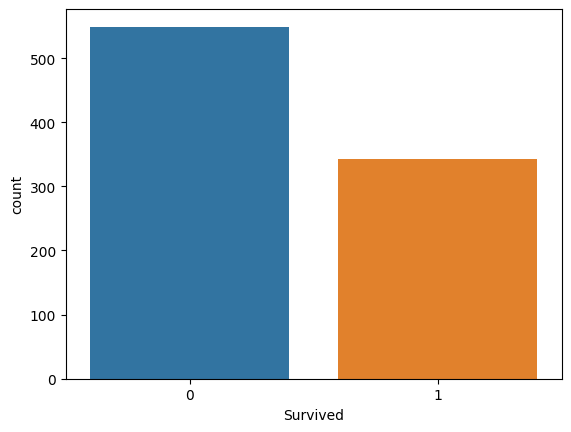

In [174]:
sns.countplot(x='Survived',data=dataset)

<Axes: xlabel='Sex', ylabel='count'>

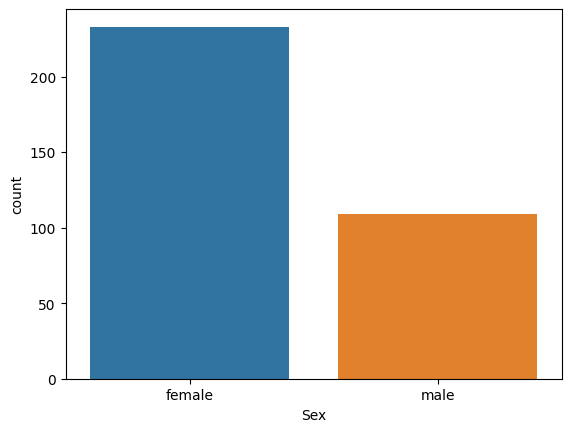

In [175]:
sns.countplot(x='Sex',data=survived)

<Axes: xlabel='Sex', ylabel='count'>

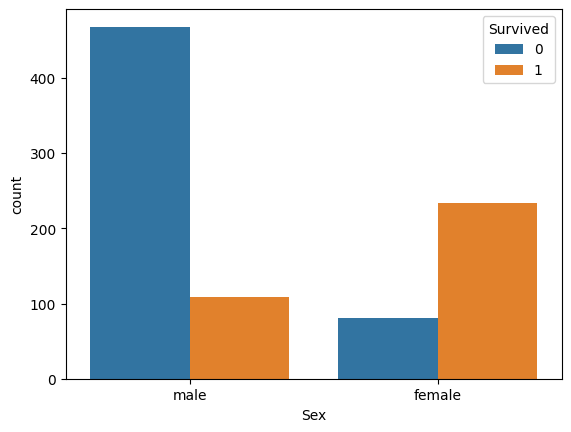

In [176]:
sns.countplot(x='Sex',hue='Survived',data=dataset)

<Axes: xlabel='Pclass', ylabel='count'>

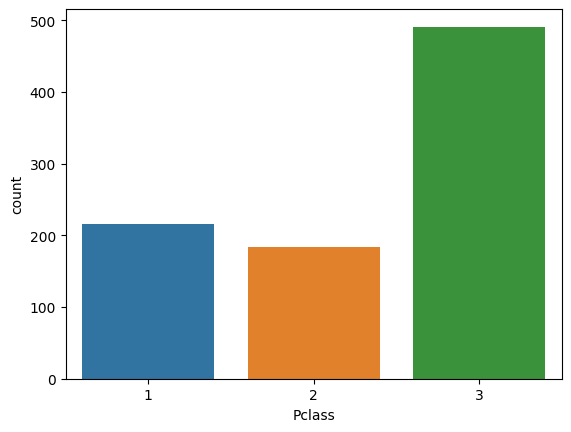

In [177]:
sns.countplot(x='Pclass',data=dataset)

<Axes: xlabel='Pclass', ylabel='count'>

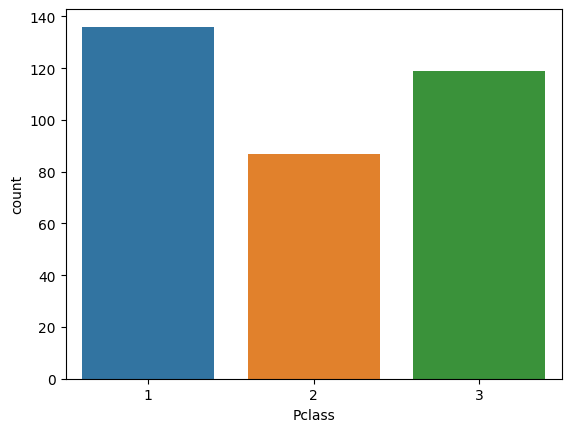

In [178]:
sns.countplot(x='Pclass',data=survived)

<Axes: xlabel='Pclass', ylabel='count'>

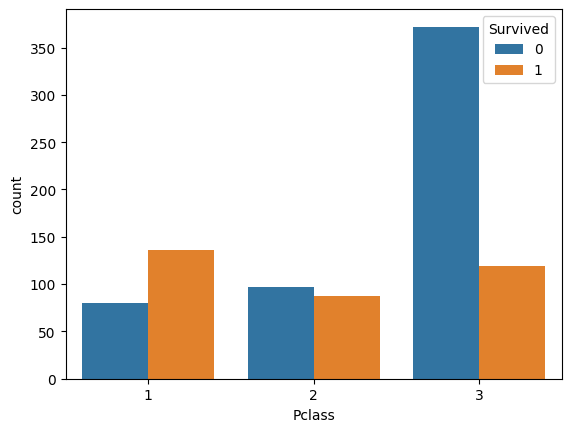

In [179]:
sns.countplot(x='Pclass',hue='Survived',data=dataset)

<Axes: xlabel='Fare', ylabel='count'>

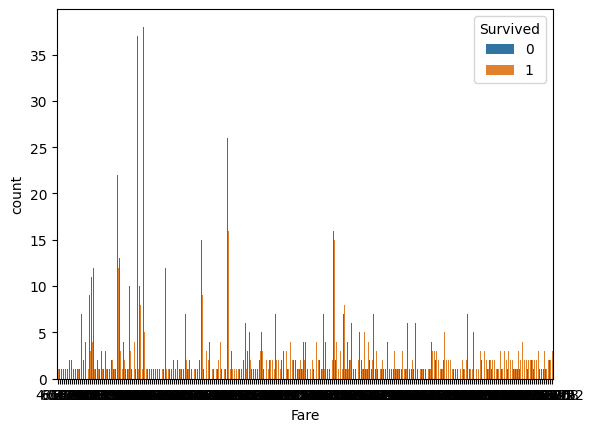

In [180]:
sns.countplot(x='Fare',hue='Survived',data=dataset)

<Axes: xlabel='Fare', ylabel='Density'>

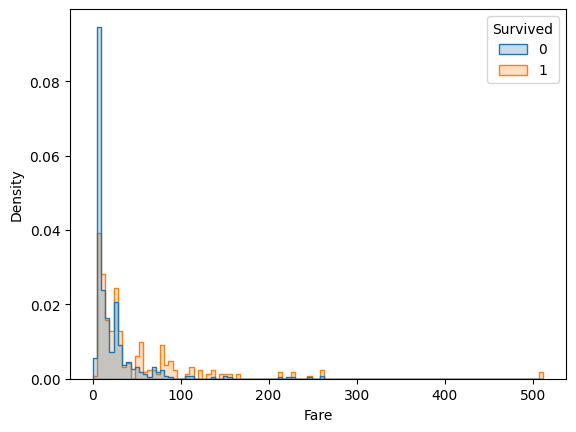

In [181]:
sns.histplot(x='Fare', hue='Survived', data=dataset, element="step", stat="density", common_norm=False)

<Axes: xlabel='Embarked', ylabel='count'>

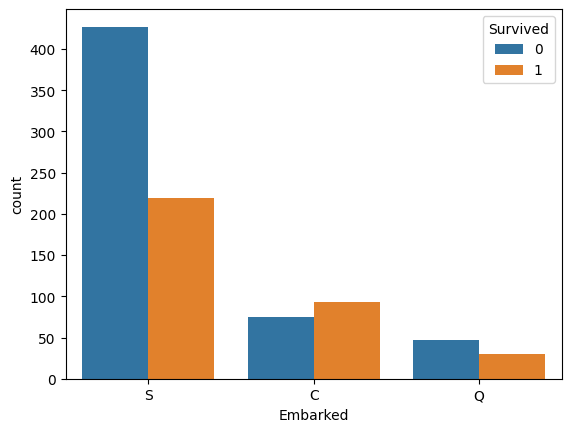

In [182]:
sns.countplot(x='Embarked',hue='Survived',data=dataset)

In [183]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Sex']=encoder.fit_transform(dataset['Sex'])

In [184]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [185]:
dataset.drop('Name',axis=1,inplace=True)

In [186]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Embarked']=encoder.fit_transform(dataset['Embarked'])

In [187]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2


In [188]:
dataset['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [189]:
X=dataset.drop(columns=['PassengerId','Survived','Ticket'],axis=1)
Y=dataset['Survived']

In [190]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


In [191]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [192]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,random_state=22,test_size=.2)

In [193]:
X.shape,X_train.shape,X_test.shape

((891, 7), (712, 7), (179, 7))

In [194]:
model=LogisticRegression()

In [195]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
X_train_prediction=model.predict(X_train)

In [197]:
print(X_train_prediction)

[1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 0 0 0 0 1 0 0 0 1 0 

In [198]:
accuracy_percentage=accuracy_score(Y_train,X_train_prediction)

In [199]:
print(accuracy_percentage)

0.8033707865168539


In [200]:
X_test_prediction=model.predict(X_test)

In [201]:
accuracy_percentage_test=accuracy_score(Y_test,X_test_prediction)

In [202]:
print(accuracy_percentage_test)

0.8268156424581006
